# Project 2

## Creating Dataset
- Dataset was downloaded from: https://github.com/jaygala24/pothole-detection/releases/download/v1.0.0/Pothole.Dataset.IVCNZ.zip
- Then the dataset was transformed to meet YOLO standards

In [50]:
# imports
import os
import random
import shutil

# Function for creating file system according to YOLO requirements
def create_yolo_file_system(dataset_path, train_split_ratio=0.8):
    # Creating Files according to YOLO requirements
    if not os.path.exists('Dataset'):
        os.makedirs('Dataset')
        print("The folder 'Dataset' has been created.")
    else:
        print("The folder 'Dataset' already exists.")
    
    if not os.path.exists('Dataset/images'):
        os.makedirs('Dataset/images')
        print("The folder 'Dataset/images' has been created.")
    else:
        print("The folder 'Dataset/images' already exists.")
    
    if not os.path.exists('Dataset/images/train'):
        os.makedirs('Dataset/images/train')
        print("The folder 'Dataset/images/train' has been created.")
    else:
        print("The folder 'Dataset/images/train' already exists.")
    
    if not os.path.exists('Dataset/images/val'):
        os.makedirs('Dataset/images/val')
        print("The folder 'Dataset/images/val' has been created.")
    else:
        print("The folder 'Dataset/images/val' already exists.")
    
    if not os.path.exists('Dataset/labels'):
        os.makedirs('Dataset/labels')
        print("The folder 'Dataset/labels' has been created.")
    else:
        print("The folder 'Dataset/labels' already exists.")
    
    if not os.path.exists('Dataset/labels/train'):
        os.makedirs('Dataset/labels/train')
        print("The folder 'Dataset/labels/train' has been created.")
    else:
        print("The folder 'Dataset/labels/train' already exists.")
    
    if not os.path.exists('Dataset/labels/val'):
        os.makedirs('Dataset/labels/val')
        print("The folder 'Dataset/labels/val' has been created.")
    else:
        print("The folder 'Dataset/labels/val' already exists.")
    
    # Current Dataset Location
    files = os.listdir(dataset_path)
    
    # Extracting file names
    file_names = []
    for file in files:
        if '.jpg' in file:
            file_name = file.split('.')[0]
            file_names.append(file_name)
    
    # Train and Validation Split
    train_split = int(len(file_names)*train_split_ratio)
    shuffled_file_names = file_names.copy()
    random.shuffle(shuffled_file_names)
    train_data_names = shuffled_file_names[:train_split]
    val_data_names = shuffled_file_names[train_split:]
    
    # Copying files according to YOLO requirements
    print('Copying files...')
    for file_name in train_data_names:
        shutil.copyfile(dataset_path+f'/{file_name}.jpg','Dataset/images/train/'+f'/{file_name}.jpg')
        shutil.copyfile(dataset_path+f'/{file_name}.txt','Dataset/labels/train/'+f'/{file_name}.txt')
        
    for file_name in val_data_names:
        shutil.copyfile(dataset_path+f'/{file_name}.jpg','Dataset/images/val/'+f'/{file_name}.jpg')
        shutil.copyfile(dataset_path+f'/{file_name}.txt','Dataset/labels/val/'+f'/{file_name}.txt')
    print('Files copied!')

# Running Function
create_yolo_file_system('Pothole Dataset')

The folder 'Dataset' has been created.
The folder 'Dataset/images' has been created.
The folder 'Dataset/images/train' has been created.
The folder 'Dataset/images/val' has been created.
The folder 'Dataset/labels' has been created.
The folder 'Dataset/labels/train' has been created.
The folder 'Dataset/labels/val' has been created.
Copying files...
Files copied!


## Exploring Dataset

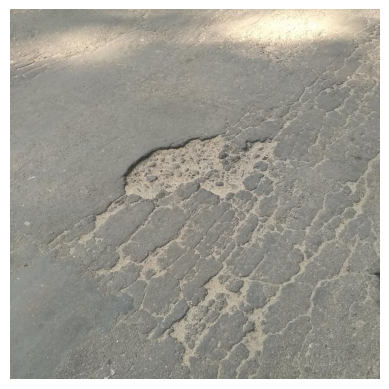

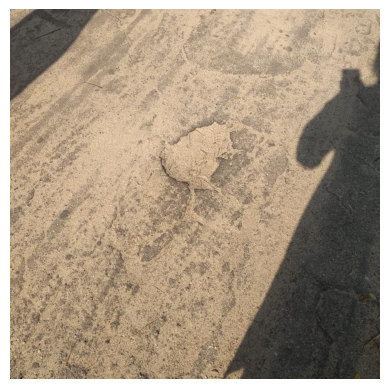

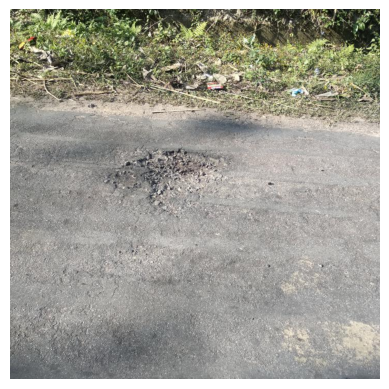

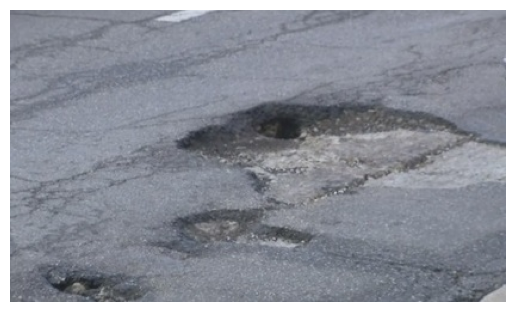

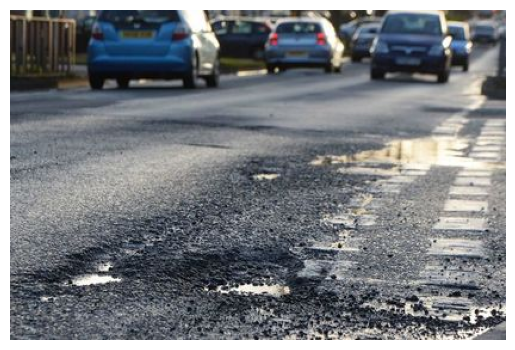

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image using matplotlib
img_path = 'Dataset/images/train'
for image in os.listdir(img_path)[:5]:
    img = Image.open('Dataset/images/train/'+image)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Training on Custom Data (Pot Holes Detection)

In [ ]:
# imports
from ultralytics import YOLO

# load model
model = YOLO("yolov8l.pt")

# training
results = model.train(data="config.yaml", epochs=3)

100%|██████████████████████████████████████████████████████████████████████████████| 83.7M/83.7M [00:36<00:00, 2.39MB/s]


Ultralytics YOLOv8.1.14 🚀 Python-3.11.0rc1 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=config.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 1.72MB/s]
2024-02-15 20:04:53.728065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 20:04:53.728106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 20:04:53.730010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:02<00:00, 3.04MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /tf/notebooks/Dataset/labels/train.cache... 994 images, 0 backgrounds, 0 corrupt: 100%|██████████| 994/9
val: Scanning /tf/notebooks/Dataset/labels/val.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      10.4G      2.024      2.454      1.997          6        640: 100%|██████████| 63/63 [09:03<00:00,  8.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:24<00

                   all        249        839   0.000295    0.00715   8.75e-05   3.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      10.7G      2.023      2.004      1.979         19        640: 100%|██████████| 63/63 [05:37<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:40<00

                   all        249        839      0.108     0.0465     0.0225    0.00808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      10.7G      1.957       1.86       1.91         73        640:  37%|███▋      | 23/63 [30:13<37:13, 55.8

In [1]:
from ultralytics import YOLO

# Path of last.pt
checkpoint_path = "runs/detect/train/weights/last.pt"

# Load model from checkpoint
model = YOLO(checkpoint_path)

# Resume training
results = model.train(data="config.yaml", epochs=1)

Ultralytics YOLOv8.1.14 🚀 Python-3.11.0rc1 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/last.pt, data=config.yaml, epochs=1, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

2024-02-15 20:57:52.993592: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 20:57:52.993627: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 20:57:52.995046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /tf/notebooks/Dataset/labels/train.cache... 994 images, 0 backgrounds, 0 corrupt: 100%|██████████| 994/9
val: Scanning /tf/notebooks/Dataset/labels/val.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      10.4G      1.894      1.875      1.898          6        640: 100%|██████████| 63/63 [09:54<00:00,  9.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:35<00


                   all        249        839      0.227      0.205      0.115     0.0396

1 epochs completed in 0.182 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 87.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.11.0rc1 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00


                   all        249        839      0.226      0.209      0.115     0.0396
Speed: 0.3ms preprocess, 11.3ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


## Evaluation

In [2]:
model.val()

Ultralytics YOLOv8.1.14 🚀 Python-3.11.0rc1 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
val: Scanning /tf/notebooks/Dataset/labels/val.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<


                   all        249        839     0.0409      0.149      0.033     0.0126
Speed: 0.3ms preprocess, 20.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcc9fcb13d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

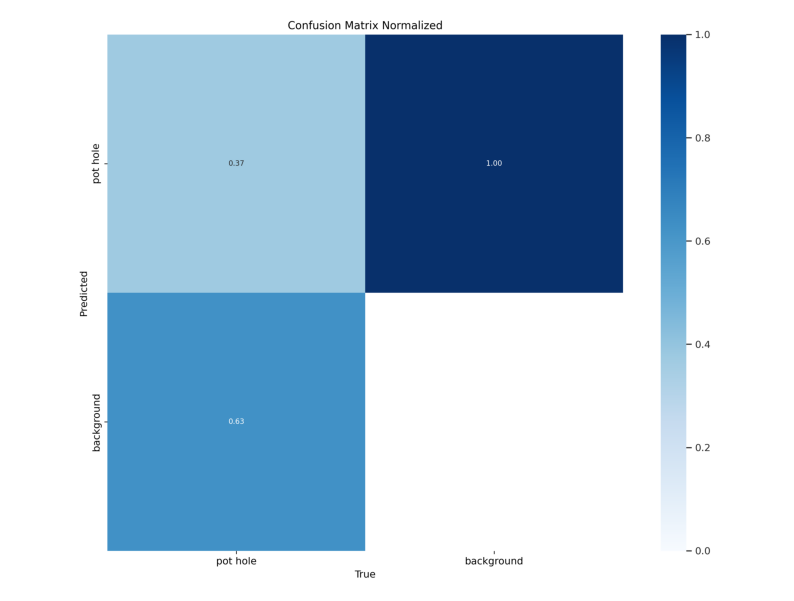

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image using matplotlib
img_path = 'runs/detect/val/confusion_matrix_normalized.png'
img = Image.open(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

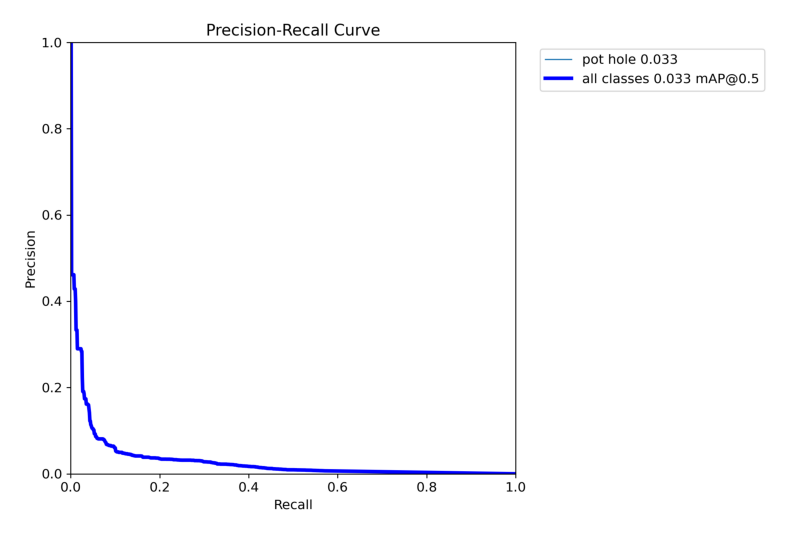

In [41]:
img_path = 'runs/detect/val/PR_curve.png'
img = Image.open(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

## Prediction


image 1/1 /tf/notebooks/Pothole Dataset/img-1.jpg: 640x640 3 pot holes, 92.6ms
Speed: 2.6ms preprocess, 92.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


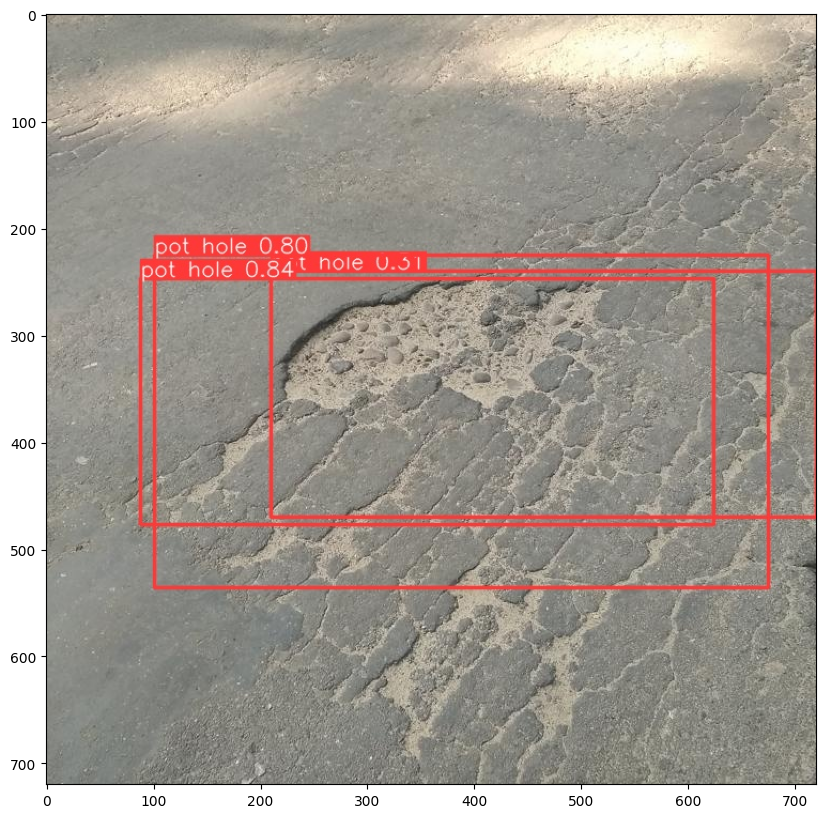

In [51]:
model_path = "runs/detect/train2/weights/best.pt"

model = YOLO(model_path)

results = model.predict('Pothole Dataset/img-1.jpg', save=True)

# Load and display the image using matplotlib
img_path = 'runs/detect/predict/img-1.jpg'
img = Image.open(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()